# Data Preparation

## Import Library

In [227]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [228]:
training_file_path = 'Data-AnalisisPenyakitDarah - modellingtraining.csv'
testing_file_path = 'Data-AnalisisPenyakitDarah - testing.csv'
train_df = pd.read_csv(training_file_path)
test_df = pd.read_csv(testing_file_path)

## Data Cleaning

In [229]:
def clean_data(df):
    # Jika file testing, mengganti nama kolom sesuai yang diinginkan
    new_column_names = ['No.', 'fitur1', 'fitur2', 'fitur3', 'fitur4', 'fitur5', 'fitur6', 'fitur7', 'Kelas']
    df.columns = new_column_names

    # Mengganti tanda koma dengan titik desimal
    for column in df.columns[1:]:
        df[column] = df[column].astype(str).str.replace(',', '.')
        df[column] = df[column].str.replace(';', '')
    
    # Mengubah tipe data ke float untuk kolom fitur
    for column in df.columns[1:-1]:
        df[column] = df[column].astype(float)

    return df

cleaned_training_data = clean_data(train_df)
cleaned_testing_data = clean_data(test_df)

In [230]:
print("Data Training yang telah dibersihkan:")
cleaned_training_data.head()

Data Training yang telah dibersihkan:


,No.,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,Kelas
0,E541,3.78,9.0,29.4,77.7,23.8,30.7,21.1,BTT
1,D272,5.94,10.3,37.5,63.1,17.4,27.5,15.9,BTT
2,F728,5.93,10.8,34.4,58.0,18.2,31.3,16.0,BTT
3,"N1,848",5.29,11.0,37.6,71.0,20.7,29.2,16.9,BTT
4,O2320,5.79,11.0,37.0,63.9,19.0,29.7,16.6,BTT


In [231]:
print("\nData Testing yang telah dibersihkan:")
cleaned_testing_data.head()


Data Testing yang telah dibersihkan:


,No.,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,Kelas
0,D290,5.20,9.8,31.4,60.4,18.8,31.2,16.8,BTT
1,"K1,164",5.26,10.9,36.4,69.2,20.8,30.1,15.5,BTT
2,F744,5.55,11.2,36.8,66.3,20.2,30.5,16.5,BTT
3,F678,6.61,11.7,38.1,57.7,17.7,30.7,16.9,BTT
4,"L1,341",4.92,11.9,37.5,76.1,24.1,31.7,16.9,BTT


## Split X dan Y

In [232]:
# Memisahkan fitur dan label
X_train = cleaned_training_data.drop(columns=['No.', 'Kelas'])
y_train = cleaned_training_data['Kelas']

X_test = cleaned_testing_data.drop(columns=['No.', 'Kelas'])
y_test = cleaned_testing_data['Kelas']

In [233]:
X_test

,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7
0,5.20,9.8,31.4,60.4,18.8,31.2,16.8
1,5.26,10.9,36.4,69.2,20.8,30.1,15.5
2,5.55,11.2,36.8,66.3,20.2,30.5,16.5
3,6.61,11.7,38.1,57.7,17.7,30.7,16.9
4,4.92,11.9,37.5,76.1,24.1,31.7,16.9
...,...,...,...,...,...,...,...
58,5.36,11.3,37.5,70.0,21.1,30.2,17.5
59,4.99,11.6,38.9,77.8,23.3,29.9,17.4
60,4.76,12.3,38.6,81.2,25.9,31.9,14.4
61,5.38,12.9,39.6,73.7,23.9,32.5,15.1


In [234]:
y_test

0     BTT
1     BTT
2     BTT
3     BTT
4     BTT
     ... 
58    mix
59    mix
60    mix
61    mix
62    mix
Name: Kelas, Length: 63, dtype: object

# Exploratory Data Analysis

## Class Distribution

DB     70
HbE    27
BTT    16
mix    14
Name: Kelas, dtype: int64


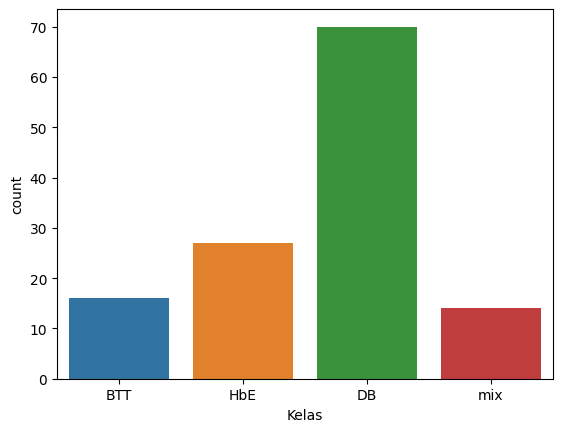

In [235]:

print(cleaned_training_data['Kelas'].value_counts())

sns.countplot(x='Kelas', data=cleaned_training_data)
plt.show()


## Pairlot visualization

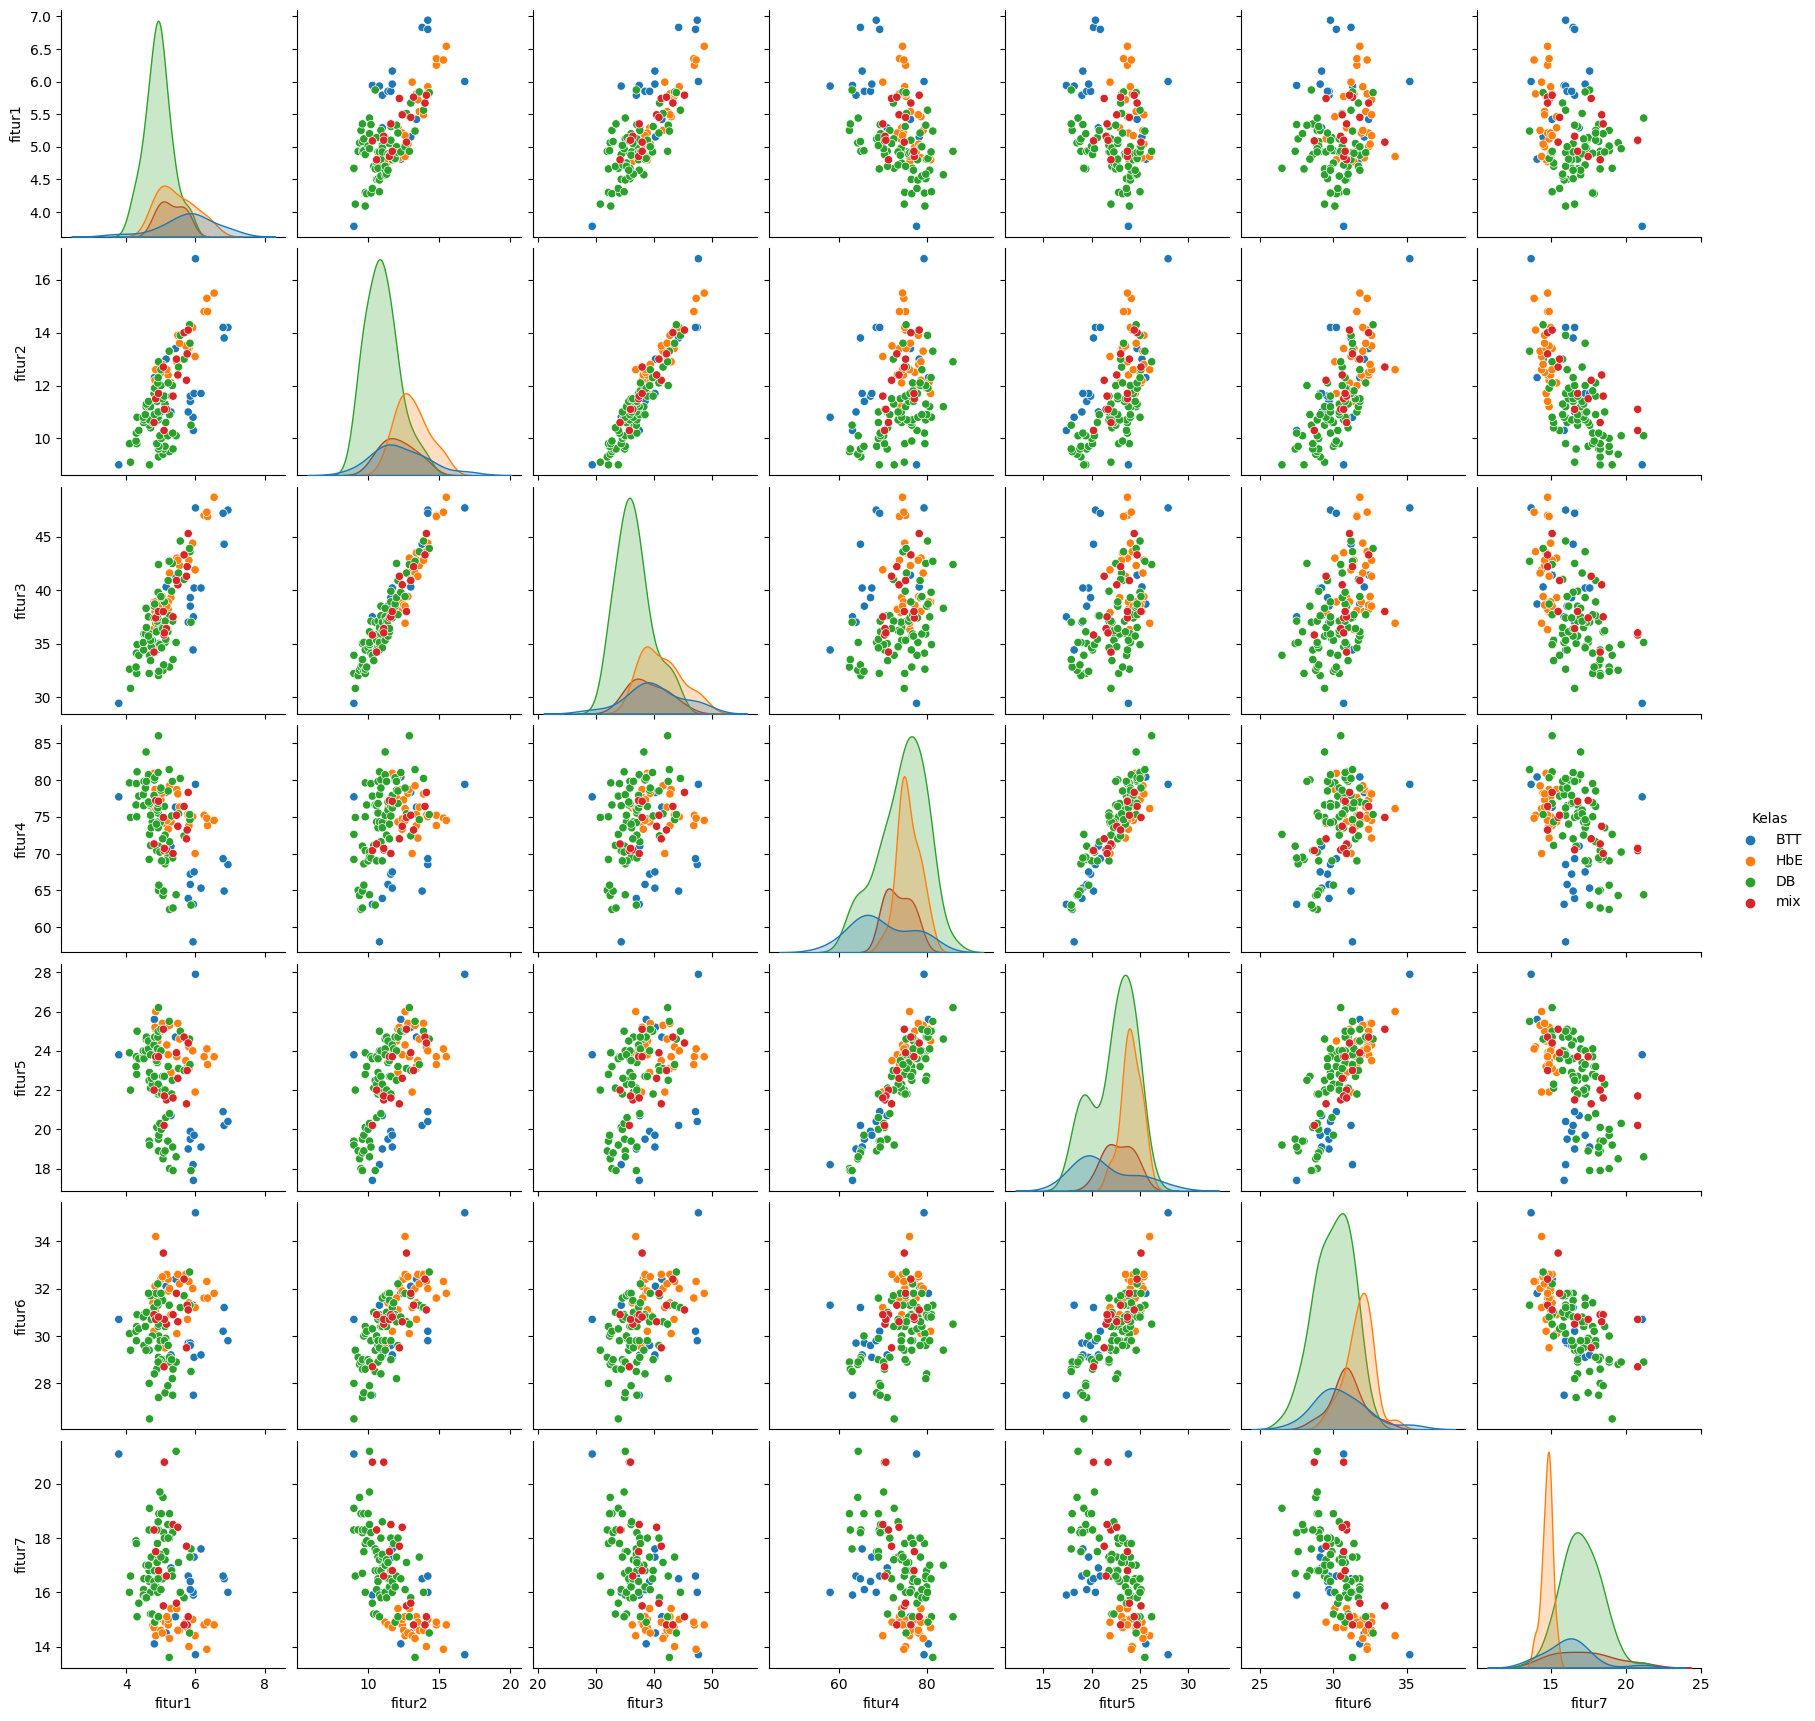

In [236]:
sns.pairplot(cleaned_training_data, hue='Kelas')
plt.show()

## Corellation Matrix for each class

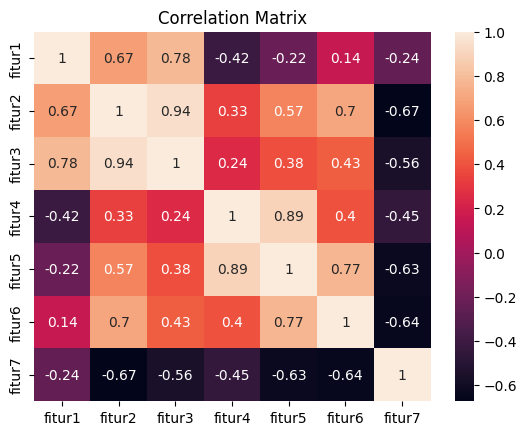

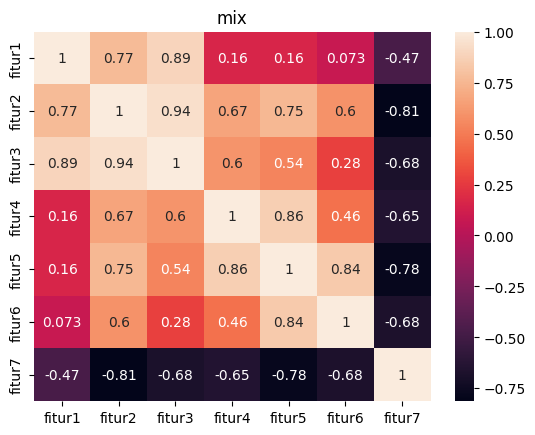

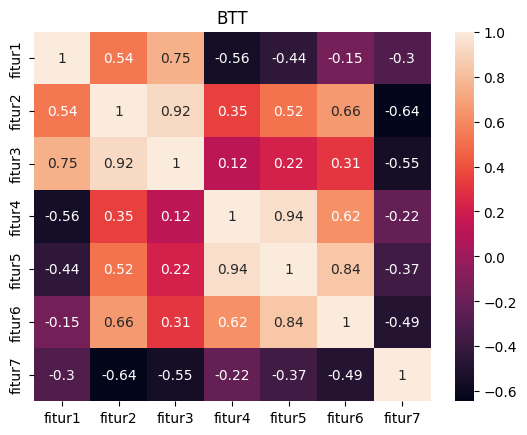

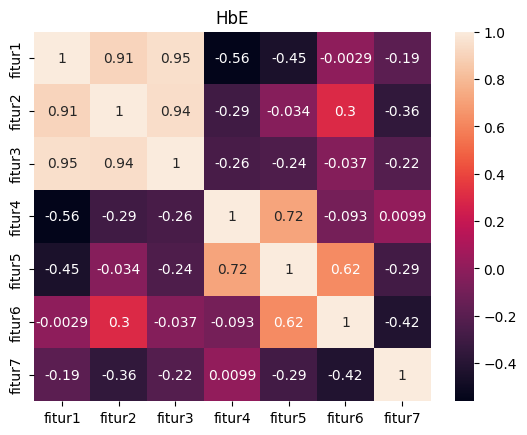

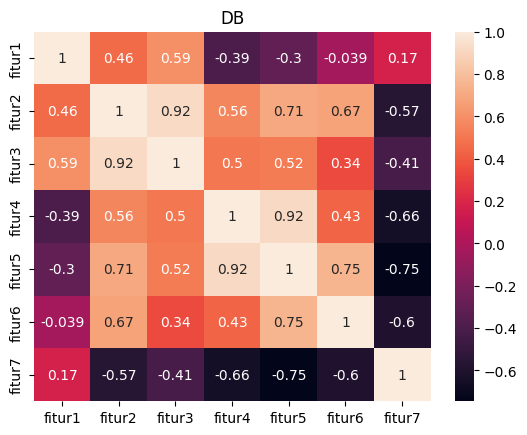

In [237]:
# correlation matrix
corr = cleaned_training_data.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

# correlation matrix for each class\
corr_matrix = cleaned_training_data[cleaned_training_data['Kelas'] == 'mix'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('mix')
plt.show()

corr_matrix = cleaned_training_data[cleaned_training_data['Kelas'] == 'BTT'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('BTT')
plt.show()

corr_matrix = cleaned_training_data[cleaned_training_data['Kelas'] == 'HbE'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('HbE')
plt.show()

corr_matrix = cleaned_training_data[cleaned_training_data['Kelas'] == 'DB'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('DB')
plt.show()





## Hist Plot untuk setiap kelas dan fitur

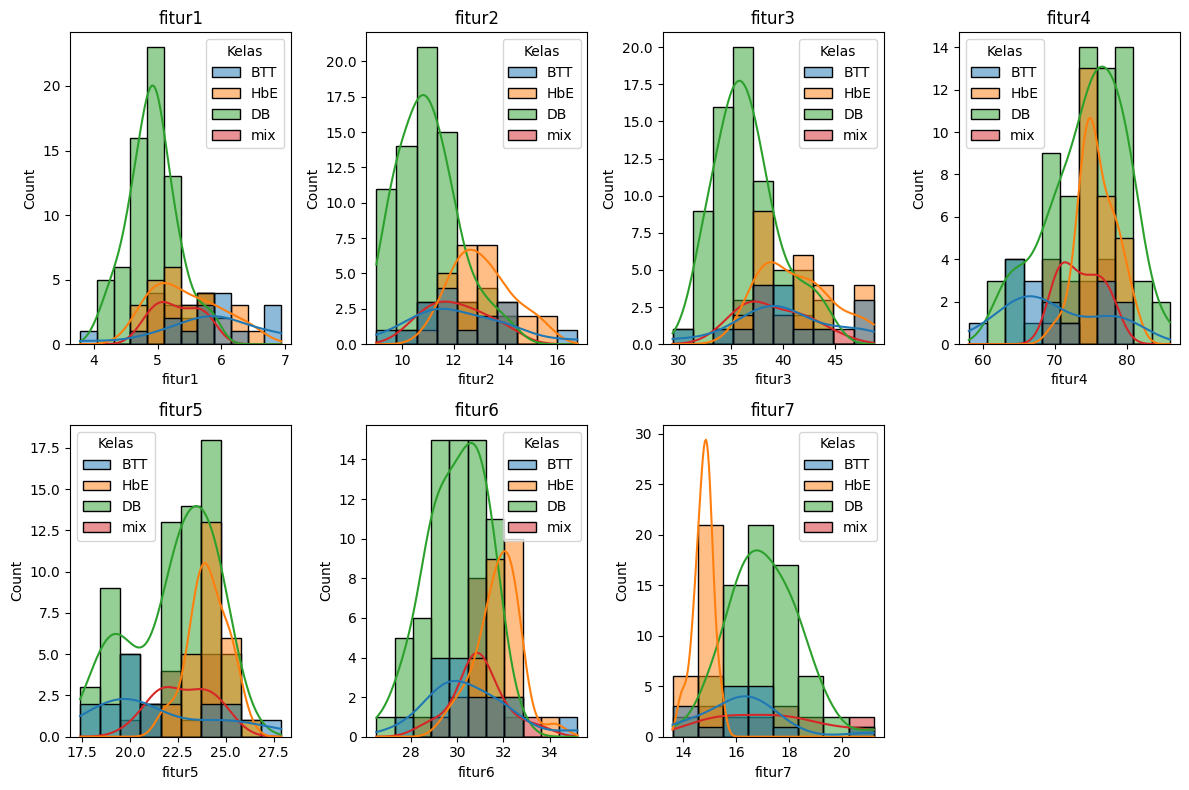

In [238]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cleaned_training_data.columns[1:-1], 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=cleaned_training_data, x=feature, hue='Kelas', kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## Box Plot untuk setiap kelas dan fitur

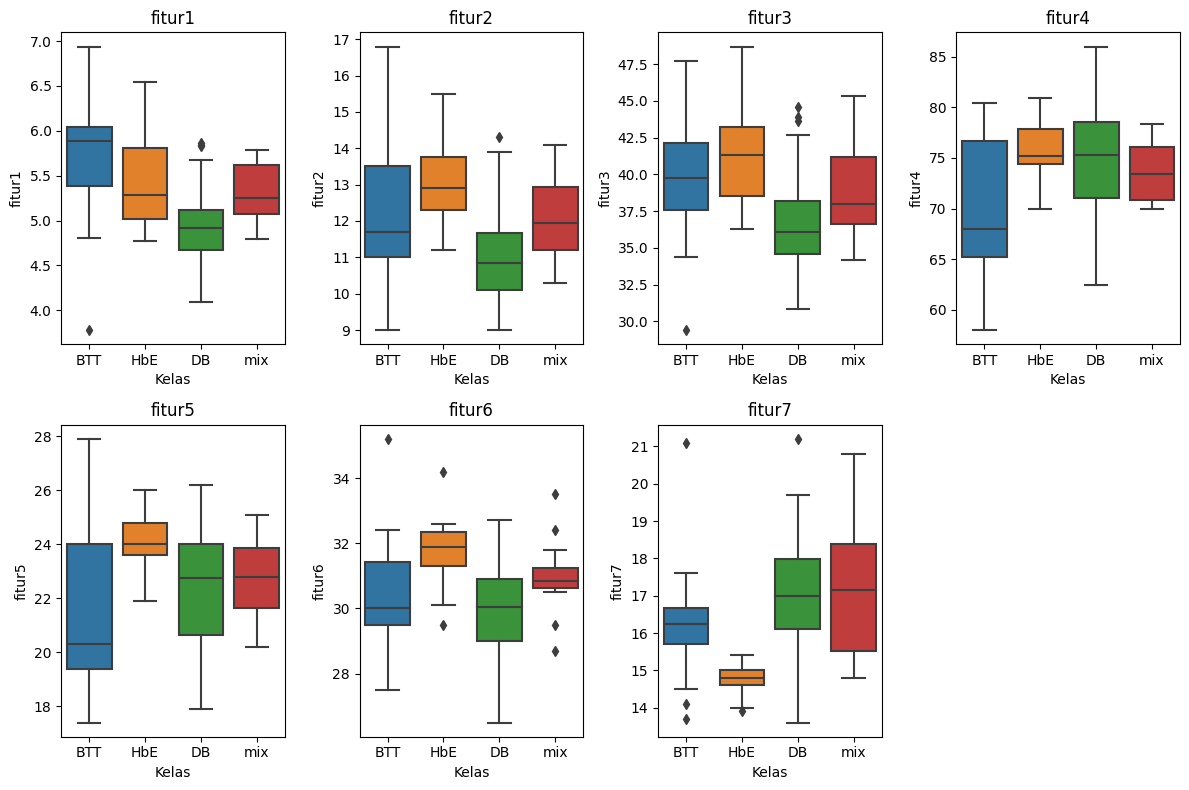

In [239]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cleaned_training_data.columns[1:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Kelas', y=feature, data=cleaned_training_data)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Preprocessing

## Normalisasi Fitur

In [240]:
# normalisasi data tanpa menggunakan library
def normalize_data(data):
    normalized_data = (data - data.min()) / (data.max() - data.min())
    return normalized_data

X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)


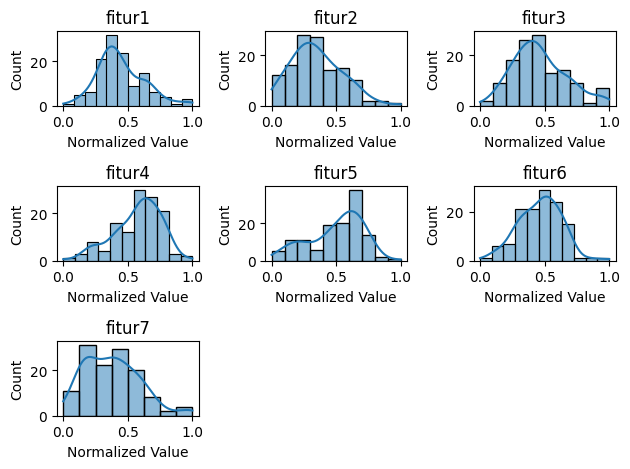

In [241]:
for i, feature in enumerate(X_train_normalized.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=X_train_normalized, x=feature, kde=True)
    plt.title(feature)
    plt.xlabel('Normalized Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Modelling

## KNN

In [242]:
def minkowski(a, b, p):
    return np.power(np.sum(np.power(np.abs(a-b), p)), 1/p)

class KNN:
    def __init__(self, p=2, k=11):
        self.p = p
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_predicted = []
        for test_row in X_test.itertuples(index=False, name=None):
            distances = self.X_train.apply(lambda row: minkowski(row.values, np.array(test_row), self.p), axis=1)
            smallest_distances = distances.nsmallest(self.k)
            indices_distances = smallest_distances.index
            classes = self.y_train[indices_distances]
            majority_class = classes.value_counts().idxmax()
            y_predicted.append(majority_class)
        return pd.Series(y_predicted)

### KNN dengan Manhattan Distances
Didapat dengan set $p = 1$

In [243]:
# Example usage
# X_train, y_train, X_test should be pandas DataFrames or Series
knn_mh = KNN(p=1, k=11)
knn_mh.fit(X_train, y_train)
y_pred_mh = knn_mh.predict(X_test)

print(y_pred_mh)

0      DB
1      DB
2     BTT
3     BTT
4      DB
     ... 
58     DB
59     DB
60    HbE
61    HbE
62    HbE
Length: 63, dtype: object


### KNN dengan Euclidean Distances 
Didapat dengan set $p = 2$

In [244]:
# Example usage
# X_train, y_train, X_test should be pandas DataFrames or Series
knn_ec = KNN(p=2, k=11)
knn_ec.fit(X_train, y_train)
y_pred_ec = knn_ec.predict(X_test)

print(y_pred_ec)
print(y_test)

0      DB
1      DB
2     BTT
3      DB
4      DB
     ... 
58     DB
59     DB
60     DB
61    HbE
62    HbE
Length: 63, dtype: object
0     BTT
1     BTT
2     BTT
3     BTT
4     BTT
     ... 
58    mix
59    mix
60    mix
61    mix
62    mix
Name: Kelas, Length: 63, dtype: object


### KNN dengan Minkowski Distances p=3
Didapat dengan set $p = 3$

In [245]:
# Example usage
# X_train, y_train, X_test should be pandas DataFrames or Series
knn_m3 = KNN(p=3, k=11)
knn_m3.fit(X_train, y_train)
y_pred_m3 = knn_m3.predict(X_test)

print(y_pred_m3)

0      DB
1      DB
2      DB
3      DB
4      DB
     ... 
58     DB
59     DB
60     DB
61    HbE
62    HbE
Length: 63, dtype: object


## Evaluasi

In [246]:
# Function to evaluate the model
def evaluate_model(y_pred, y_test):
    classes = np.unique(y_test)
    accuracy = np.mean(y_pred == y_test)
    
    precision = []
    recall = []
    f1_score = []
    
    for cls in classes:
        true_positive = np.sum((y_pred == cls) & (y_test == cls))
        false_positive = np.sum((y_pred == cls) & (y_test != cls))
        false_negative = np.sum((y_pred != cls) & (y_test == cls))
        
        cls_precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        cls_recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        cls_f1_score = 2 * (cls_precision * cls_recall) / (cls_precision + cls_recall) if (cls_precision + cls_recall) > 0 else 0
        
        precision.append(cls_precision)
        recall.append(cls_recall)
        f1_score.append(cls_f1_score)
    
    precision = np.mean(precision)
    recall = np.mean(recall)
    f1_score = np.mean(f1_score)
    
    return accuracy, precision, recall, f1_score

In [247]:


# Function to compute the confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    for i in range(len(y_true)):
        actual_class = np.where(classes == y_true[i])[0][0]
        predicted_class = np.where(classes == y_pred[i])[0][0]
        matrix[actual_class, predicted_class] += 1
    
    return matrix, classes

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(matrix, classes):
    plt.figure(figsize=(7, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [248]:
# Evaluate KNN with Manhattan distance
accuracy_mh, precision_mh, recall_mh, f1_score_mh = evaluate_model(y_pred_mh, y_test)
matrix_mh, classes_mh = confusion_matrix(y_test, y_pred_mh)

# Evaluate KNN with Euclidean distance
accuracy_ec, precision_ec, recall_ec, f1_score_ec = evaluate_model(y_pred_ec, y_test)
matrix_ec, classes_ec = confusion_matrix(y_test, y_pred_ec)

# Evaluate KNN with Minkowski distance (p=3)
accuracy_m3, precision_m3, recall_m3, f1_score_m3 = evaluate_model(y_pred_m3, y_test)
matrix_m3, classes_m3 = confusion_matrix(y_test, y_pred_m3)


Evaluation results for KNN with Manhattan distance:
Accuracy: 0.746031746031746
Precision: 0.603625170998632
Recall: 0.5328256302521008
F1-score: 0.5280687054880603


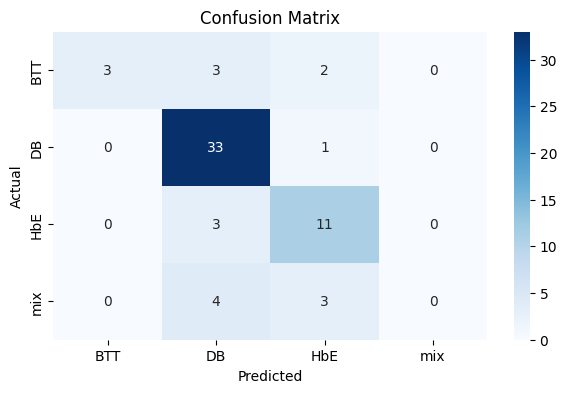

Evaluation results for KNN with Euclidean distance:
Accuracy: 0.7301587301587301
Precision: 0.6027131782945736
Recall: 0.5120798319327731
F1-score: 0.49529220779220784


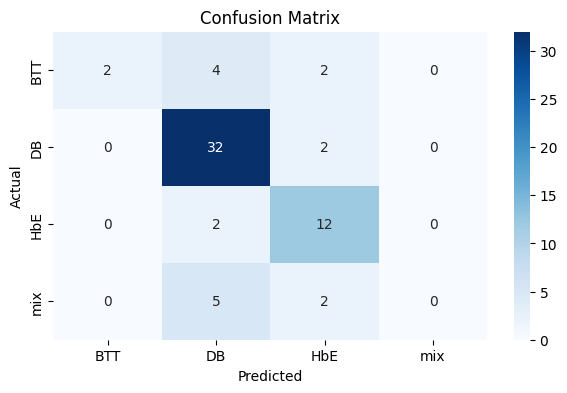


Evaluation results for KNN with Minkowski distance:
Accuracy: 0.6825396825396826
Precision: 0.3428030303030303
Recall: 0.4422268907563025
F1-score: 0.3862179487179488


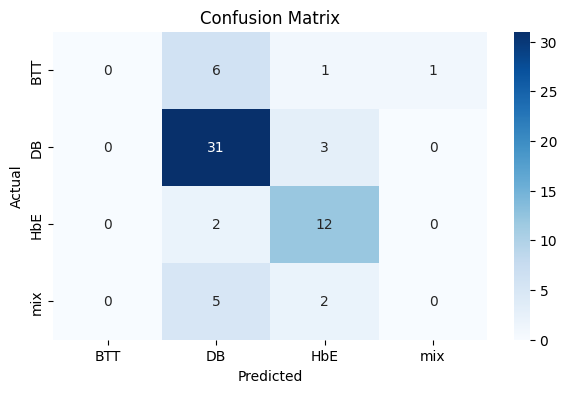

In [249]:
# Print the evaluation results and confusion matrices
print("\nEvaluation results for KNN with Manhattan distance:")
print("Accuracy:", accuracy_mh)
print("Precision:", precision_mh)
print("Recall:", recall_mh)
print("F1-score:", f1_score_mh)
plot_confusion_matrix(matrix_mh, classes_mh)

print("Evaluation results for KNN with Euclidean distance:")
print("Accuracy:", accuracy_ec)
print("Precision:", precision_ec)
print("Recall:", recall_ec)
print("F1-score:", f1_score_ec)
plot_confusion_matrix(matrix_ec, classes_ec)

print("\nEvaluation results for KNN with Minkowski distance:")
print("Accuracy:", accuracy_m3)
print("Precision:", precision_m3)
print("Recall:", recall_m3)
print("F1-score:", f1_score_m3)
plot_confusion_matrix(matrix_m3, classes_m3)

In [250]:
data = {
    "Method": ["KNN with Manhattan", "KNN with Euclidean", "KNN with Minkowski p=3"],
    "Accuracy": [accuracy_mh, accuracy_ec, accuracy_m3],
    "Precision": [precision_mh, precision_ec, precision_m3],
    "Recall": [recall_mh, recall_ec, recall_m3],
    "F1-score": [f1_score_mh, f1_score_ec, f1_score_m3]
}

df = pd.DataFrame(data)

# Menampilkan hasil evaluasi dalam bentuk tabel
df


,Method,Accuracy,Precision,Recall,F1-score
0,KNN with Manhattan,0.746032,0.603625,0.532826,0.528069
1,KNN with Euclidean,0.730159,0.602713,0.512080,0.495292
2,KNN with Minkowski p=3,0.682540,0.342803,0.442227,0.386218


## Parameter tuning

### Search Best K Parameter


Best results:

Evaluation results for KNN with manhattan distance:
k: 9
Accuracy: 0.746031746031746
Precision: 0.603625170998632
Recall: 0.5328256302521008
F1-score: 0.5660200368012558


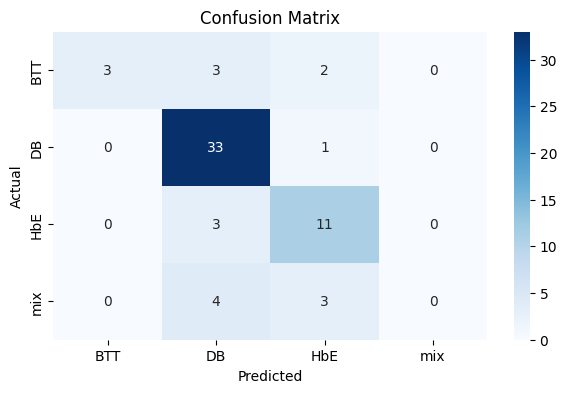


Evaluation results for KNN with euclidean distance:
k: 10
Accuracy: 0.746031746031746
Precision: 0.6125170998632011
Recall: 0.5433298319327731
F1-score: 0.5758527427286836


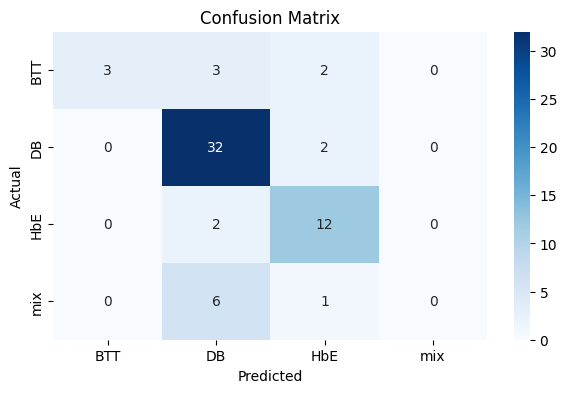


Evaluation results for KNN with minkowski3 distance:
k: 4
Accuracy: 0.7301587301587301
Precision: 0.6104166666666667
Recall: 0.5538340336134453
F1-score: 0.5807503909656851


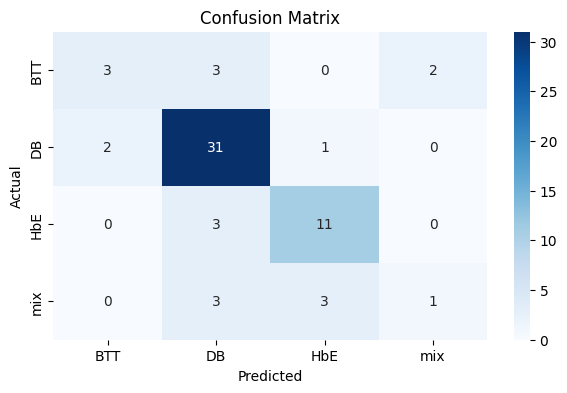

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_best_k(X_train, y_train, X_test, y_test):
    best_overall = {
        'manhattan': {'k': 0, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0},
        'euclidean': {'k': 0, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0},
        'minkowski3': {'k': 0, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0}
    }

    for p, method in [(1, 'manhattan'), (2, 'euclidean'), (3, 'minkowski3')]:
        
        for k in range(1, 20):
            knn = KNN(p=p, k=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            
            accuracy = np.mean(y_pred == y_test)
            precision = np.mean([np.sum((y_pred == cls) & (y_test == cls)) / np.sum(y_pred == cls) if np.sum(y_pred == cls) > 0 else 0 for cls in np.unique(y_test)])
            recall = np.mean([np.sum((y_pred == cls) & (y_test == cls)) / np.sum(y_test == cls) if np.sum(y_test == cls) > 0 else 0 for cls in np.unique(y_test)])
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            if accuracy > best_overall[method]['accuracy']:
                best_overall[method] = {
                    'k': k,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1_score': f1_score,
                    'y_pred': y_pred
                }

    return best_overall

# Example usage
best_results = find_best_k(X_train, y_train, X_test, y_test)

print("\nBest results:")
for method, result in best_results.items():
    print(f"\nEvaluation results for KNN with {method} distance:")
    print("k:", result['k'])
    print("Accuracy:", result['accuracy'])
    print("Precision:", result['precision'])
    print("Recall:", result['recall'])
    print("F1-score:", result['f1_score'])
    
    matrix, classes = confusion_matrix(y_test, result['y_pred'])
    plot_confusion_matrix(matrix, classes)


plt.show()

### Search Best K Parameter and Feature Selection

In [255]:
from itertools import combinations

def find_best_k_and_features(X_train, y_train, X_test, y_test, max_features=3):
    features = X_train.columns
    best_overall = {
        'manhattan': {'k': 0, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'features': []},
        'euclidean': {'k': 0, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'features': []},
        'minkowski3': {'k': 0, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'features': []}
    }

    for n in range(1, max_features + 1):
        for feature_combo in combinations(features, n):
            X_train_subset = X_train[list(feature_combo)]
            X_test_subset = X_test[list(feature_combo)]

            for p, method in [(1, 'manhattan'), (2, 'euclidean'), (3, 'minkowski3')]:
                best_k = 0
                best_accuracy = 0
                best_precision = 0
                best_recall = 0
                best_f1_score = 0

                print(f"Method: {method}, Features: {list(feature_combo)}")

                for k in range(1, 12):
                    knn = KNN(p=p, k=k)
                    knn.fit(X_train_subset, y_train)
                    y_pred = knn.predict(X_test_subset)
                    accuracy, precision, recall, f1_score = evaluate_model(y_pred, y_test)

                    if accuracy > best_accuracy:
                        best_k = k
                        best_accuracy = accuracy
                        best_precision = precision
                        best_recall = recall
                        best_f1_score = f1_score

                if best_accuracy > best_overall[method]['accuracy']:
                    best_overall[method] = {
                        'k': best_k,
                        'accuracy': best_accuracy,
                        'precision': best_precision,
                        'recall': best_recall,
                        'f1_score': best_f1_score,
                        'features': list(feature_combo)
                    }
                print(f"Best k: {best_k:.2f}, Accuracy: {best_accuracy:.2f}, Precision: {best_precision:.2f}, Recall: {best_recall:.2f}, F1-score: {best_f1_score:.2f}")
    return best_overall

best_results = find_best_k_and_features(X_train, y_train, X_test, y_test, max_features=7)



Method: manhattan, Features: ['fitur1']
Best k: 7.00, Accuracy: 0.59, Precision: 0.42, Recall: 0.36, F1-score: 0.36
Method: euclidean, Features: ['fitur1']
Best k: 7.00, Accuracy: 0.59, Precision: 0.42, Recall: 0.36, F1-score: 0.36
Method: minkowski3, Features: ['fitur1']
Best k: 7.00, Accuracy: 0.59, Precision: 0.42, Recall: 0.36, F1-score: 0.36
Method: manhattan, Features: ['fitur2']
Best k: 11.00, Accuracy: 0.67, Precision: 0.32, Recall: 0.42, F1-score: 0.37
Method: euclidean, Features: ['fitur2']
Best k: 11.00, Accuracy: 0.67, Precision: 0.32, Recall: 0.42, F1-score: 0.37
Method: minkowski3, Features: ['fitur2']
Best k: 11.00, Accuracy: 0.67, Precision: 0.32, Recall: 0.42, F1-score: 0.37
Method: manhattan, Features: ['fitur3']
Best k: 10.00, Accuracy: 0.62, Precision: 0.30, Recall: 0.39, F1-score: 0.34
Method: euclidean, Features: ['fitur3']
Best k: 10.00, Accuracy: 0.62, Precision: 0.30, Recall: 0.39, F1-score: 0.34
Method: minkowski3, Features: ['fitur3']
Best k: 10.00, Accuracy:

Best results:
Manhattan:
  k=3
  Features: fitur2, fitur4, fitur5, fitur7
  Accuracy: 0.7778
  Precision: 0.7441
  Recall: 0.6253
  F1-score: 0.6470



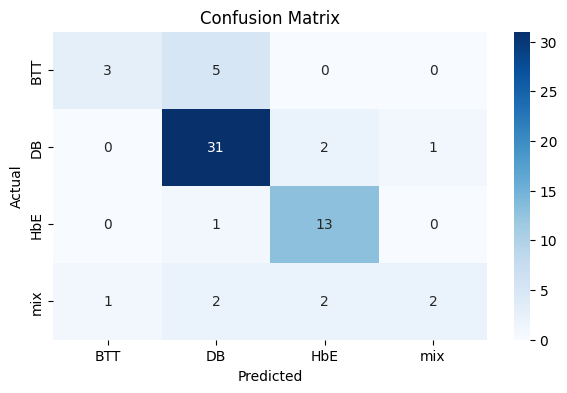

Euclidean:
  k=8
  Features: fitur2, fitur5, fitur6, fitur7
  Accuracy: 0.7778
  Precision: 0.6265
  Recall: 0.6058
  F1-score: 0.6021



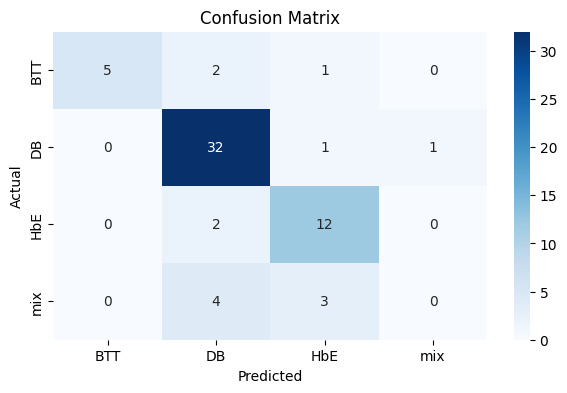

Minkowski3:
  k=10
  Features: fitur2, fitur5, fitur6, fitur7
  Accuracy: 0.7778
  Precision: 0.6229
  Recall: 0.5819
  F1-score: 0.5773



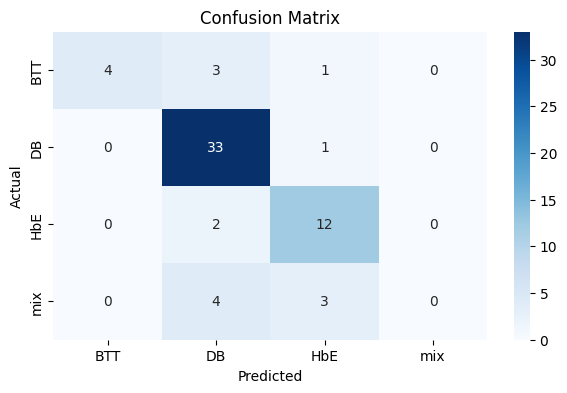

In [257]:
print("Best results:")
for distance_method, result in best_results.items():
    print(f"{distance_method.capitalize()}:")
    print(f"  k={result['k']}")
    print(f"  Features: {', '.join(result['features'])}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-score: {result['f1_score']:.4f}")
    print()

    # Use the best k and features to create and evaluate the model
    X_train_best = X_train[result['features']]
    X_test_best = X_test[result['features']]
    knn = KNN(p=1 if distance_method == 'manhattan' else 2 if distance_method == 'euclidean' else 3, k=result['k'])
    knn.fit(X_train_best, y_train)
    y_pred = knn.predict(X_test_best)

    # Plot confusion matrix
    matrix, classes = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(matrix, classes)